# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


<ipython-input-2-909cde080613>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.subplot(2,2,1)


(array([ 10.,  26.,  86., 160., 220., 238., 148.,  80.,  27.,   5.]),
 array([-8.6271544 , -6.90480978, -5.18246516, -3.46012055, -1.73777593,
        -0.01543131,  1.70691331,  3.42925793,  5.15160255,  6.87394716,
         8.59629178]),
 <BarContainer object of 10 artists>)

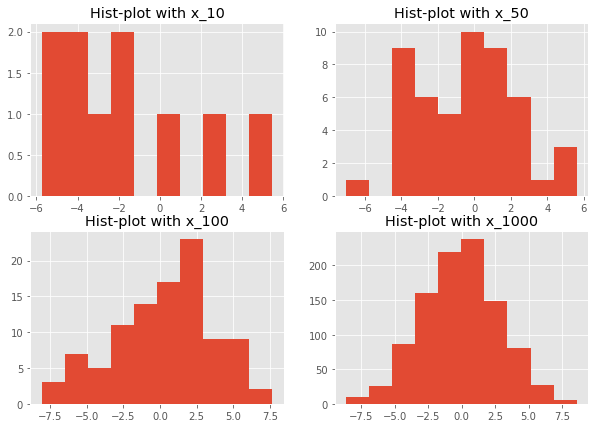

In [2]:
# Plot histograms and Q-Q plots for above datasets
fig, ax = plt.subplots(figsize=(10, 7))
plt.subplot(2,2,1)
ax1=plt.subplot(2,2,1)
ax1.set_title('Hist-plot with x_10')
plt.hist(x_10)

ax2=plt.subplot(2,2,2)
ax2.set_title('Hist-plot with x_50')
plt.hist(x_50)

ax3=plt.subplot(2,2,3)
ax3.set_title('Hist-plot with x_100')
plt.hist(x_100)

ax4=plt.subplot(2,2,4)
ax4.set_title('Hist-plot with x_1000')
plt.hist(x_1000)





<ipython-input-3-eee18b0aa16e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.subplot(2,2,1)


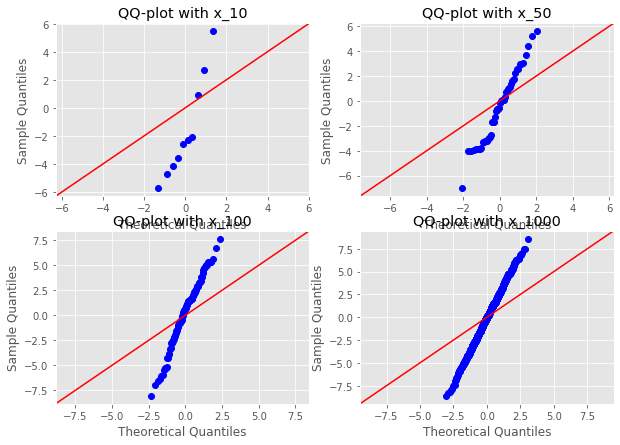

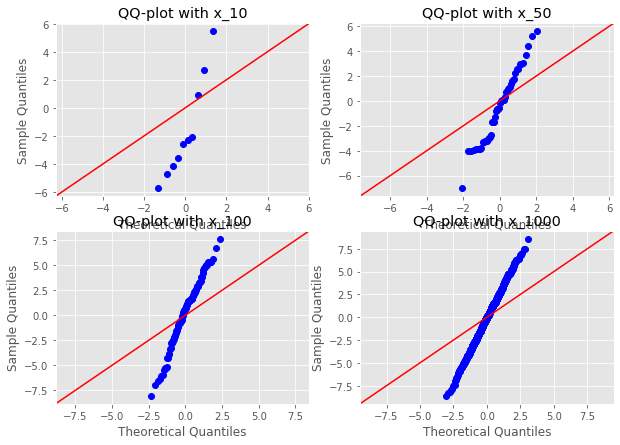

In [3]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.subplot(2,2,1)
ax1=plt.subplot(2,2,1)
ax1.set_title('QQ-plot with x_10')
ax2=plt.subplot(2,2,2)
ax2.set_title('QQ-plot with x_50')
ax3=plt.subplot(2,2,3)
ax3.set_title('QQ-plot with x_100')
ax4=plt.subplot(2,2,4)
ax4.set_title('QQ-plot with x_1000')

sm.qqplot(x_10, line ='45', ax=ax1)

sm.qqplot(x_50, line ='45', ax=ax2)
sm.qqplot(x_100, line ='45', ax=ax3)
sm.qqplot(x_1000, line ='45', ax=ax4)

In [4]:
# Your comments here 
#The early histograms are illustrative, but the one with higher data points looks generally normal, with a little skew.
#on the other hand, all the qq plots don't fall along the 45 degree angle line. then again, as long as it's inline, it should
#represent normal dist - just with non-one st dev.

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

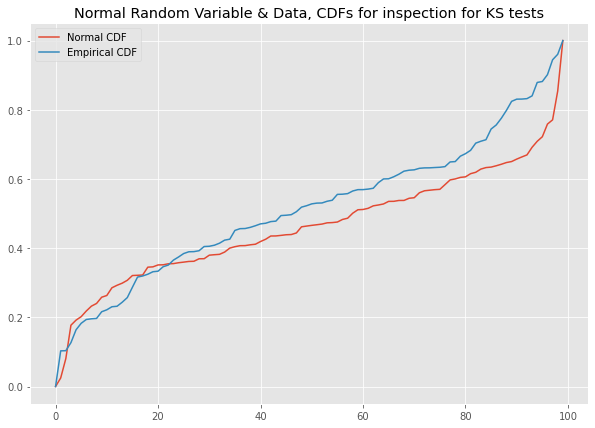

In [37]:
# You code here 

def ks_plot(data):
    fig, ax = plt.subplots(figsize=(10, 7))
#    plt.subplot(2,1,1)
#    ax1=plt.subplot(2,1,1)
    ax.set_title('Normal Random Variable & Data, CDFs for inspection for KS tests')
    #plt.hist(x_10)
    
    n=len(data)
    norm_cdf = stats.norm.rvs(loc=0, scale=3, size=n)
    norm_cum = (sorted(norm_cdf)-min(norm_cdf))/(max(norm_cdf)-min(norm_cdf))
    #norm_cum = (np.cumsum(norm_cdf)-min(norm_cdf))/(max(norm_cdf)-min(norm_cdf))
#     xs=np.arange(-4,4,0.01)
#     ecdf=stats.norm.cdf(data)
#     #plt.xkcd()
#     plt.plot(xs,hist)
    plt.plot((norm_cum), label='Normal CDF')
    
    
    #data_cum = (np.cumsum(data)-min(data))/(max(data)-min(data))
    data_cum = ((sorted(data))-min(sorted(data)))/(max(sorted(data))-min(sorted(data)))
    plt.plot(sorted(data_cum), label = 'Empirical CDF')
    plt.legend()
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
# ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


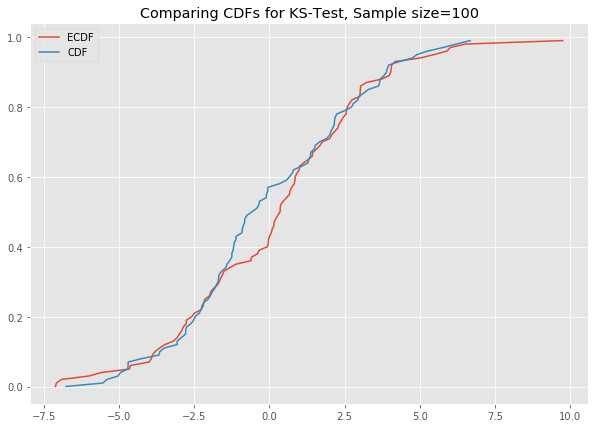

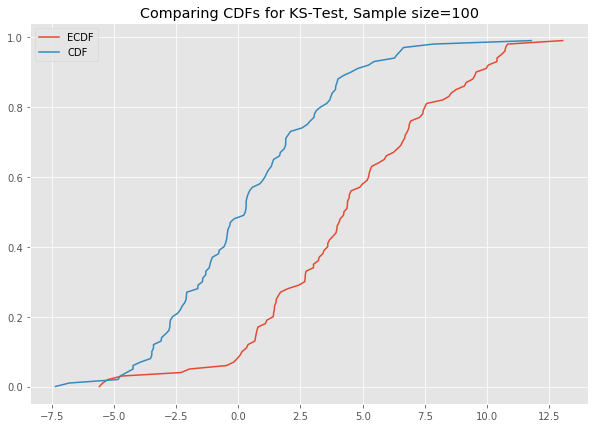

In [7]:
# You code here 

#def ks_plot(data):

#    pass
    
# Uncomment below to run the test
# ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
# ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

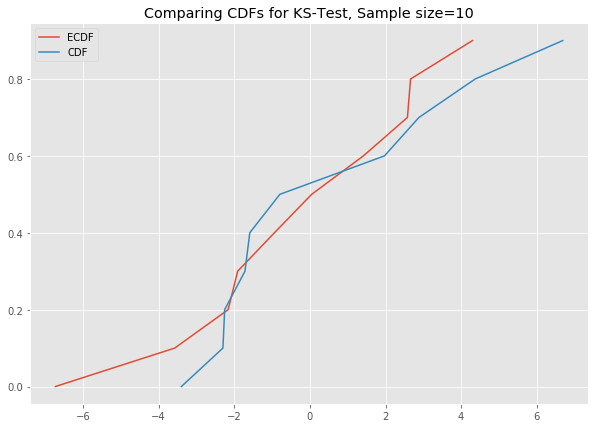

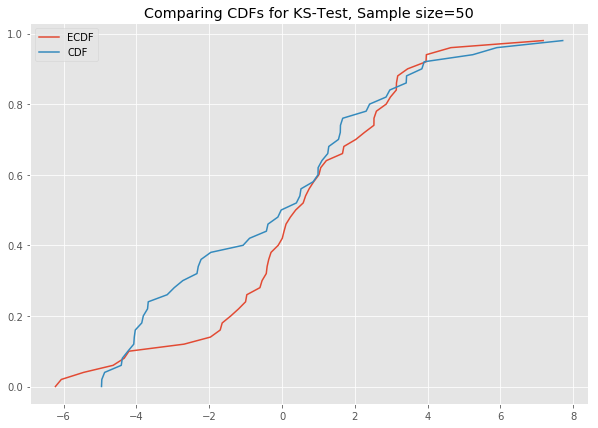

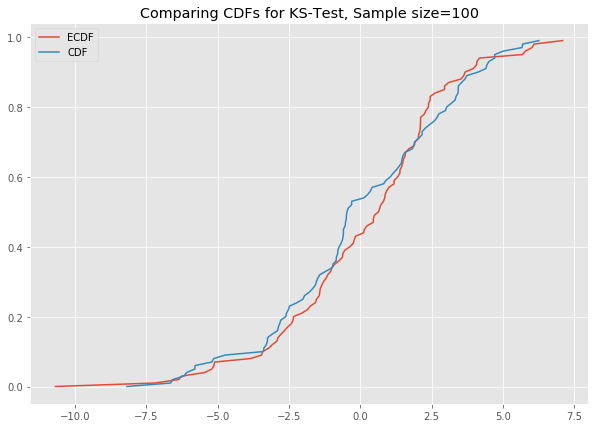

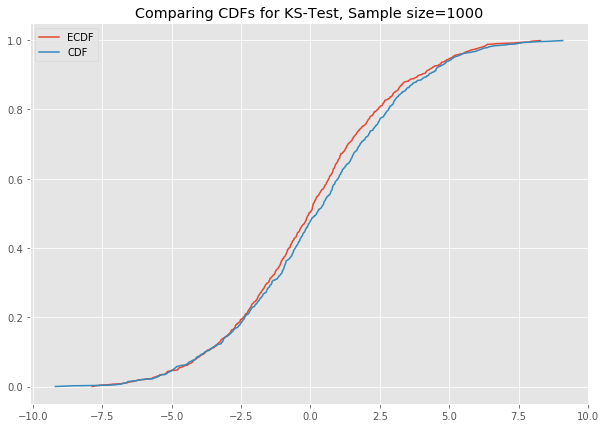

In [12]:
# Your code here 
for dataset in [x_10 ,x_50,x_100 ,x_1000]:
    ks_plot(dataset)

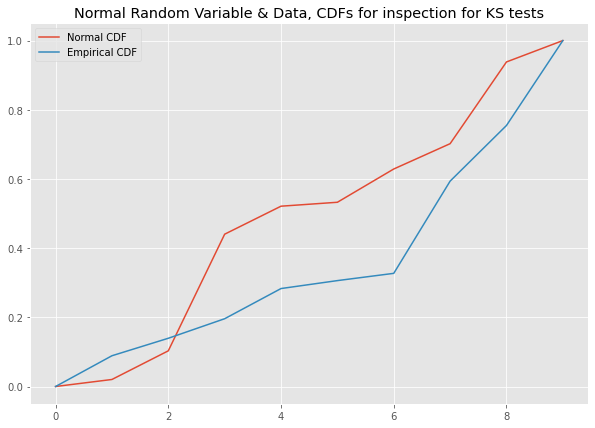

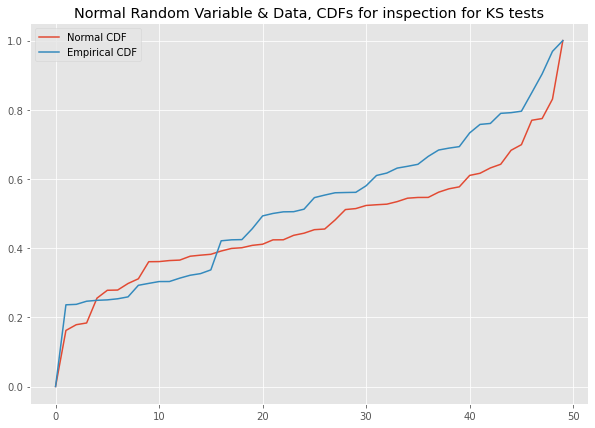

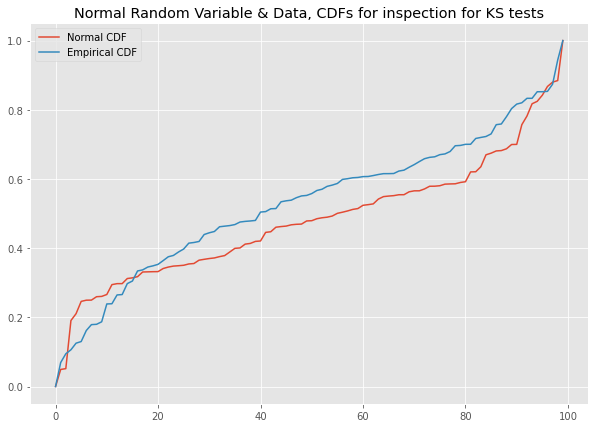

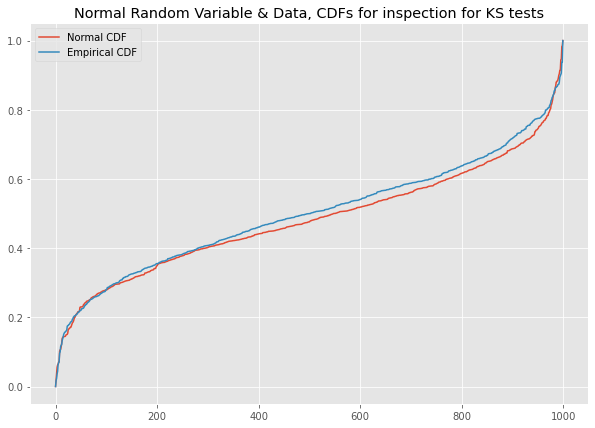

In [38]:
# Your code here 
for dataset in [x_10 ,x_50,x_100 ,x_1000]:
    ks_plot(dataset)

In [ ]:
# Your comments here 

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [45]:
# Perform K-S test 

# Your code here 
def KstestResult(rvs, cdf):
    N=len(rvs)
    d, pval = stats.kstest(rvs, cdf, args=(), N=N)
    return d, pval


for dataset in [x_10 ,x_50,x_100 ,x_1000]:
    norm_cdf = stats.norm.rvs(loc=0, scale=3, size=len(dataset))
    print(KstestResult(dataset, norm_cdf))

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

(0.6, 0.05244755244755244)
(0.14, 0.7166468440414822)
(0.16, 0.1548386665118475)
(0.032, 0.6854967337920594)


In [ ]:
# Your comments here 
#this lab has very insufficient instructions and guidance.

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [49]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution
for dataset in [x_10 ,x_50,x_100 ,x_1000]:
    print(KstestResult(dataset, x_uni))
    
print()
print(KstestResult(x_uni, np.random.rand(1000)))
print(KstestResult(x_uni, norm_cdf))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

(0.7, 2.2632379936937674e-05)
(0.54, 1.8618440122963875e-13)
(0.47, 5.847569990754548e-19)
(0.503, 2.0224359298863315e-115)

(0.027, 0.8595454206943325)
(0.487, 6.969070055089962e-108)


In [ ]:
# Your comments here 

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

1000

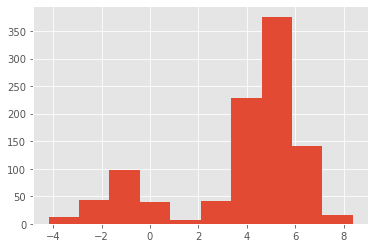

In [60]:
# Generate binomial data
N = 1000
#x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
#the provided sample only generates 500 points....so...i'm fixing it
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.2 * N)), np.random.normal(5, 1, int(0.8 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);
len(x_1000_bi)

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

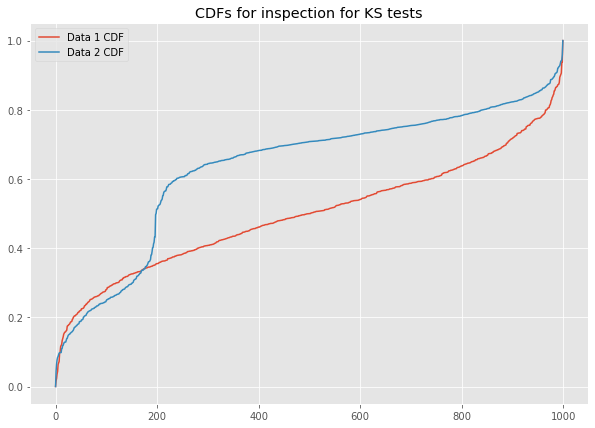

In [61]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title('CDFs for inspection for KS tests')
    
    n=len(data_1)
    d1_cum = (sorted(data_1)-min(data_1))/(max(data_1)-min(data_1))
    plt.plot((d1_cum), label='Data 1 CDF')
    
    
    #data_cum = (np.cumsum(data)-min(data))/(max(data)-min(data))
    d2_cum = (sorted(data_2)-min(data_2))/(max(data_2)-min(data_2))
#    data_cum = ((sorted(data))-min(sorted(data)))/(max(sorted(data))-min(sorted(data)))
    plt.plot(sorted(d2_cum), label = 'Data 2 CDF')
    plt.legend()

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 
#Yep, quite a gap in the middle there

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [64]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

KstestResult(statistic=0.648, pvalue=3.0955112783356777e-198)

In [ ]:
# Your comments here 
#looks close.  seemingly VERY unlikely to be from same distributuion

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 